# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as xmpltlb
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from itertools import cycle

import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


# Reading Data

In [ ]:
dt = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Vehicle Evaluation/Data/car.data")

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
dt.columns=col_names

# Analyzing Data

In [ ]:
dt

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
dt.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
dt.sample()

,buying,maint,doors,persons,lug_boot,safety,class
191,vhigh,high,5more,2,med,low,unacc


In [ ]:
dt.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
dt.shape

(1727, 7)

In [ ]:
dt['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

# EDA

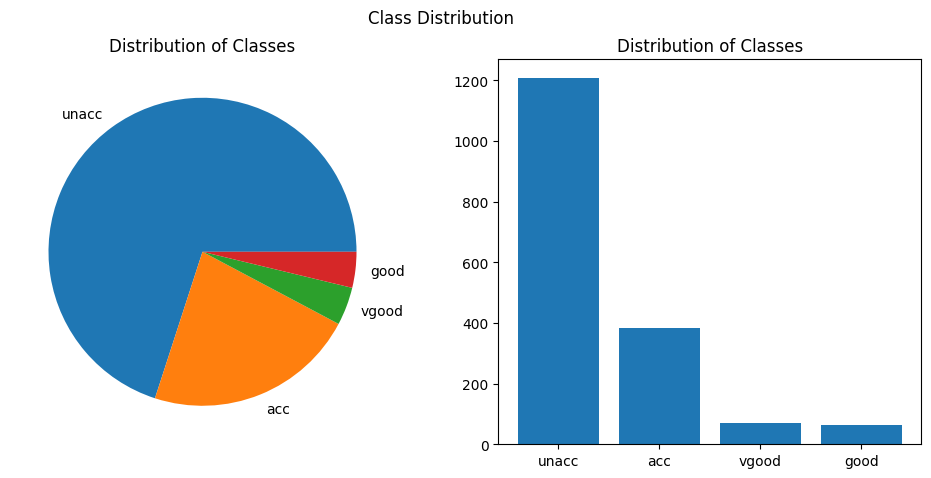

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = xmpltlb.subplots(1, 2, figsize=(12,5))

# Create a pie chart in the first subplot
ax1.pie(dt['class'].value_counts(), labels=dt['class'].unique())
ax1.set_title('Distribution of Classes')

# Create a bar chart in the second subplot
ax2.bar(dt['class'].unique(), dt['class'].value_counts())
ax2.set_title('Distribution of Classes')

# Add a title to the figure
fig.suptitle('Class Distribution')

# Show the plot
xmpltlb.show()

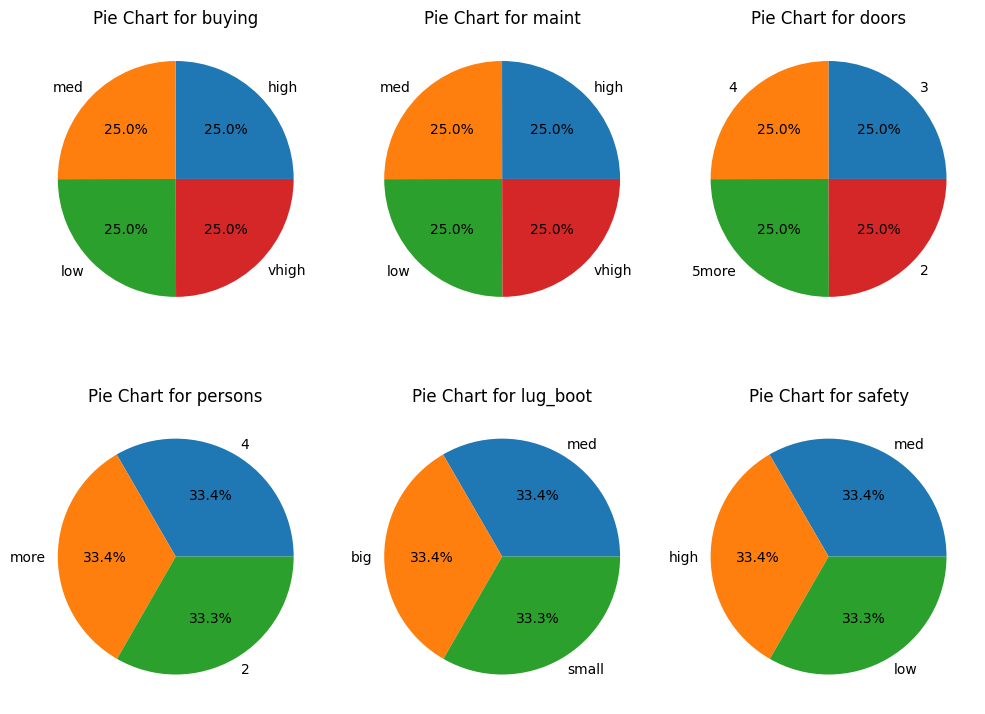

In [ ]:
n = len(col_names)-1
ncols = 3
nrows = n // ncols + (n % ncols > 0)

# Create a new figure and axes for the subplots
fig, axs = xmpltlb.subplots(nrows, ncols, figsize=(10, 8))

# Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[n:]:
    fig.delaxes(ax)

for ax, col in zip(axs, col_names):
    # Calculate the counts of unique values in the column
    value_counts = dt[col].value_counts()

    # Generate the pie chart on the subplot
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

    # Add a title to the subplot
    ax.set_title(f'Pie Chart for {col}')

# Adjust the layout and show the plot
xmpltlb.tight_layout()
xmpltlb.show()


In [ ]:
# Assuming 'dt' is your DataFrame
le = LabelEncoder()

# Convert categorical to numerical for specified columns
for column in ['buying', 'maint', 'lug_boot', 'safety', 'class']:
    dt[column] = le.fit_transform(dt[column])

# Replace '5more' with 5 in 'doors' column
dt['doors'] = dt['doors'].replace('5more', '5')

# Replace 'more' with 6 in 'persons' column
dt['persons'] = dt['persons'].replace('more', '6')

# Convert 'doors' and 'persons' columns to numeric
dt['doors'] = pd.to_numeric(dt['doors'])
dt['persons'] = pd.to_numeric(dt['persons'])


In [ ]:
X = dt.drop(['class'],axis=1)
y = dt['class']

In [ ]:
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,2
1,3,3,2,2,2,0
2,3,3,2,2,1,1
3,3,3,2,2,1,2
4,3,3,2,2,1,0
...,...,...,...,...,...,...
1722,1,1,5,6,1,2
1723,1,1,5,6,1,0
1724,1,1,5,6,0,1
1725,1,1,5,6,0,2


In [ ]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1722    1
1723    3
1724    2
1725    1
1726    3
Name: class, Length: 1727, dtype: int64

In [ ]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


In [ ]:
y_smote.value_counts()

2    1209
0    1209
3    1209
1    1209
Name: class, dtype: int64

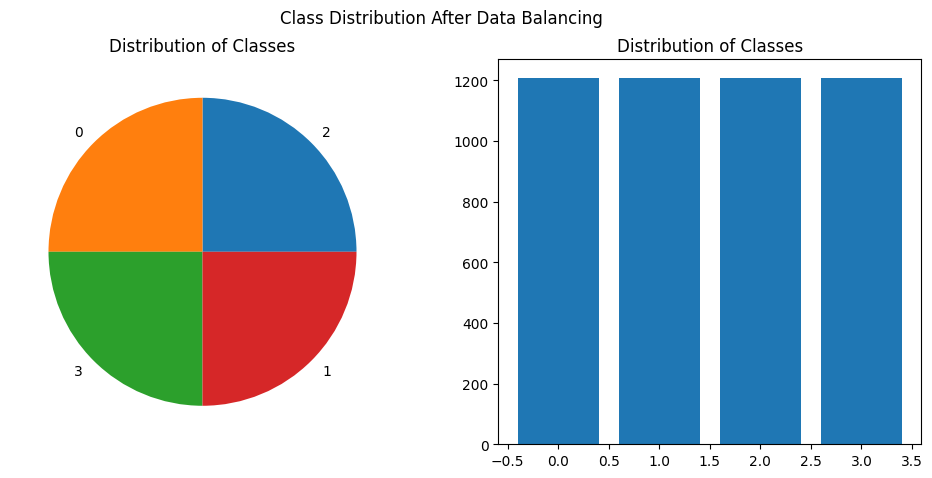

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = xmpltlb.subplots(1, 2, figsize=(12,5))

# Create a pie chart in the first subplot
ax1.pie(y_smote.value_counts(), labels=y_smote.unique())
ax1.set_title('Distribution of Classes')

# Create a bar chart in the second subplot
ax2.bar(y_smote.unique(), y_smote.value_counts())
ax2.set_title('Distribution of Classes')

# Add a title to the figure
fig.suptitle('Class Distribution After Data Balancing')

# Show the plot
xmpltlb.show()

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state= 42)

# Machine Learning Models

## XGBoost

### Model

In [ ]:
Xgb_model = xgb.XGBClassifier(use_label_encoder=False, n_estimators=10, max_depth=2, learning_rate=1, gamma=5)
Xgb_model.fit(X_train, y_train)

y_Xgb_pred_train = Xgb_model.predict(X_train)
y_Xgb_pred_test = Xgb_model.predict(X_test)

### Training Results

In [ ]:
acc_xgb_train = accuracy_score(y_train, y_Xgb_pred_train)
precision_xgb_train = precision_score(y_train, y_Xgb_pred_train, average='macro')
recall_xgb_train = recall_score(y_train, y_Xgb_pred_train, average='macro')
f1_xgb_train = f1_score(y_train, y_Xgb_pred_train, average='macro')

print(f"Training Accuracy of XGBoost : {acc_xgb_train}")
print(f"Training Precision of XGBoost : {precision_xgb_train}")
print(f"Training Recall of XGBoost : {recall_xgb_train}")
print(f"Training F1 Score of XGBoost : {f1_xgb_train}")

Training Accuracy of XGBoost : 0.9364844903988183
Training Precision of XGBoost : 0.9383116429830292
Training Recall of XGBoost : 0.936148371136147
Training F1 Score of XGBoost : 0.9360396887631612


In [ ]:
print(classification_report(y_train, y_Xgb_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       838
           1       0.92      0.97      0.94       865
           2       1.00      0.90      0.95       839
           3       0.93      1.00      0.96       843

    accuracy                           0.94      3385
   macro avg       0.94      0.94      0.94      3385
weighted avg       0.94      0.94      0.94      3385



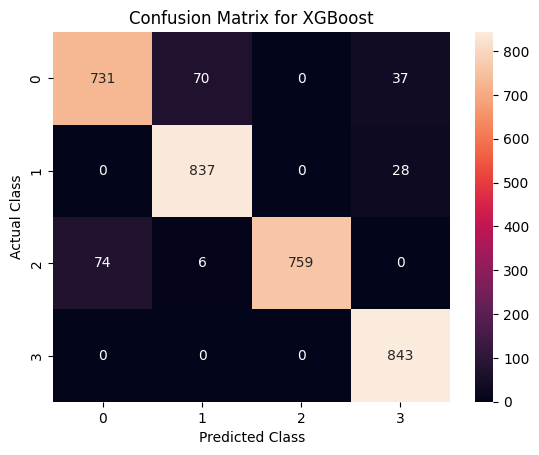

In [ ]:
cm = confusion_matrix(y_train, y_Xgb_pred_train)
sns.heatmap(cm, annot=True, fmt='g')
xmpltlb.xlabel('Predicted Class')
xmpltlb.ylabel('Actual Class')
xmpltlb.title('Confusion Matrix for XGBoost')
xmpltlb.show()


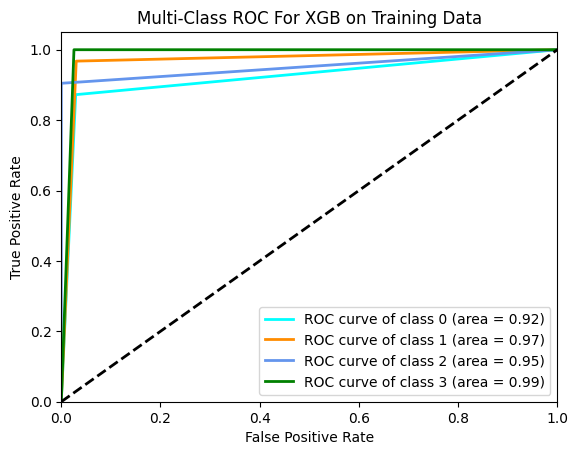

In [ ]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])
y_Xgb_pred_train_bin = label_binarize(y_Xgb_pred_train, classes=[0, 1, 2, 3])

n_classes = y_train_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_Xgb_pred_train_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
xmpltlb.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(n_classes), colors):
    xmpltlb.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

xmpltlb.plot([0, 1], [0, 1], 'k--', lw=2)
xmpltlb.xlim([0.0, 1.0])
xmpltlb.ylim([0.0, 1.05])
xmpltlb.xlabel('False Positive Rate')
xmpltlb.ylabel('True Positive Rate')
xmpltlb.title('Multi-Class ROC For XGB on Training Data')
xmpltlb.legend(loc="lower right")
xmpltlb.show()


### Testing Results

In [ ]:
acc_xgb_test = accuracy_score(y_test, y_Xgb_pred_test)
precision_xgb_test = precision_score(y_test, y_Xgb_pred_test, average='macro')
recall_xgb_test = recall_score(y_test, y_Xgb_pred_test, average='macro')
f1_xgb_test = f1_score(y_test, y_Xgb_pred_test, average='macro')

print(f"Testing Accuracy of XGBoost : {acc_xgb_test}")
print(f"Testing Precision of XGBoost : {precision_xgb_test}")
print(f"Testing Recall of XGBoost : {recall_xgb_test}")
print(f"Testing F1 Score of XGBoost : {f1_xgb_test}")

Testing Accuracy of XGBoost : 0.9338387319090282
Testing Precision of XGBoost : 0.9351453648047559
Testing Recall of XGBoost : 0.9345221647711774
Testing F1 Score of XGBoost : 0.933418284134573


In [ ]:
print(classification_report(y_test, y_Xgb_pred_test))


              precision    recall  f1-score   support

           0       0.92      0.85      0.88       371
           1       0.90      0.96      0.93       344
           2       1.00      0.93      0.96       370
           3       0.91      1.00      0.95       366

    accuracy                           0.93      1451
   macro avg       0.94      0.93      0.93      1451
weighted avg       0.94      0.93      0.93      1451



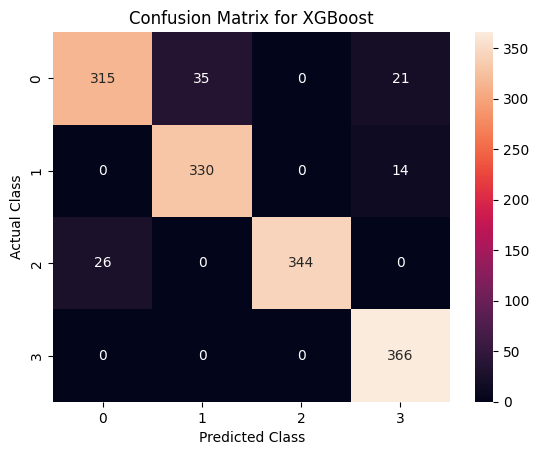

In [ ]:
cm = confusion_matrix(y_test, y_Xgb_pred_test)
sns.heatmap(cm, annot=True, fmt='g')
xmpltlb.xlabel('Predicted Class')
xmpltlb.ylabel('Actual Class')
xmpltlb.title('Confusion Matrix for XGBoost')
xmpltlb.show()

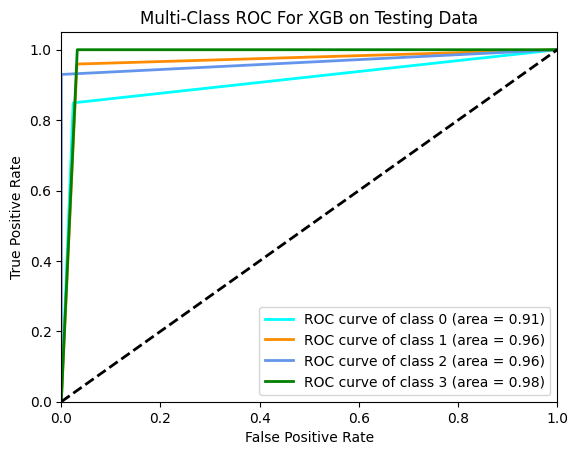

In [ ]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_Xgb_pred_test_bin = label_binarize(y_Xgb_pred_test, classes=[0, 1, 2, 3])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_Xgb_pred_test_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
xmpltlb.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(n_classes), colors):
    xmpltlb.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

xmpltlb.plot([0, 1], [0, 1], 'k--', lw=2)
xmpltlb.xlim([0.0, 1.0])
xmpltlb.ylim([0.0, 1.05])
xmpltlb.xlabel('False Positive Rate')
xmpltlb.ylabel('True Positive Rate')
xmpltlb.title('Multi-Class ROC For XGB on Testing Data')
xmpltlb.legend(loc="lower right")
xmpltlb.show()


## Extra Trees

In [ ]:
Et_model = ExtraTreesClassifier(n_estimators=10, max_depth=8, min_samples_split=10, min_samples_leaf=10)

# Train the model
Et_model.fit(X_train, y_train)

# Make predictions
y_ET_pred_train = Et_model.predict(X_train)
y_ET_pred_test = Et_model.predict(X_test)

In [ ]:
acc_ET_train = accuracy_score(y_train, y_ET_pred_train)
precision_ET_train = precision_score(y_train, y_ET_pred_train, average='macro')
recall_ET_train = recall_score(y_train, y_ET_pred_train, average='macro')
f1_ET_train = f1_score(y_train, y_ET_pred_train, average='macro')

print(f"Training Accuracy of Extra Trees : {acc_ET_train}")
print(f"Training Precision of Extra Trees : {precision_ET_train}")
print(f"Training Recall of Extra Trees : {recall_ET_train}")
print(f"Training F1 Score of Extra Trees : {f1_ET_train}")

Training Accuracy of Extra Trees : 0.9394387001477105
Training Precision of Extra Trees : 0.9406237699904143
Training Recall of Extra Trees : 0.9391266866100177
Training F1 Score of Extra Trees : 0.9388509876720948


In [ ]:
print(classification_report(y_train, y_ET_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       838
           1       0.93      0.97      0.95       865
           2       0.99      0.92      0.95       839
           3       0.92      1.00      0.96       843

    accuracy                           0.94      3385
   macro avg       0.94      0.94      0.94      3385
weighted avg       0.94      0.94      0.94      3385



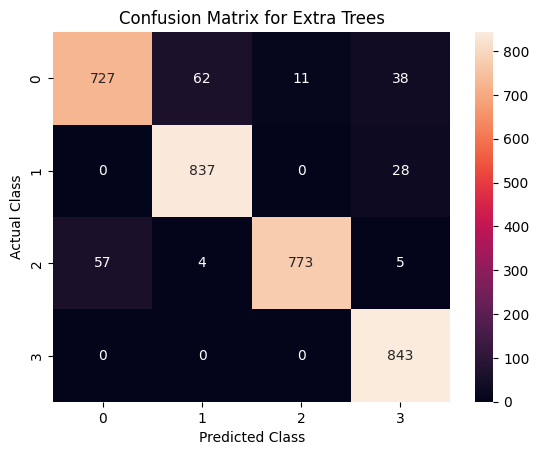

In [ ]:
cm = confusion_matrix(y_train, y_ET_pred_train)
sns.heatmap(cm, annot=True, fmt='g')
xmpltlb.xlabel('Predicted Class')
xmpltlb.ylabel('Actual Class')
xmpltlb.title('Confusion Matrix for Extra Trees')
xmpltlb.show()


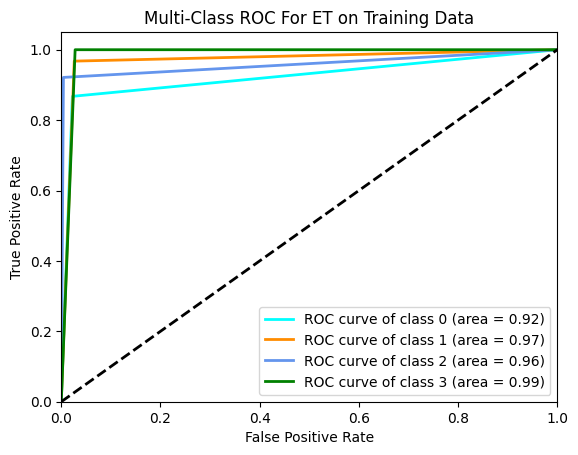

In [ ]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])
y_ET_pred_train_bin = label_binarize(y_ET_pred_train, classes=[0, 1, 2, 3])

n_classes = y_train_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_ET_pred_train_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
xmpltlb.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(n_classes), colors):
    xmpltlb.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

xmpltlb.plot([0, 1], [0, 1], 'k--', lw=2)
xmpltlb.xlim([0.0, 1.0])
xmpltlb.ylim([0.0, 1.05])
xmpltlb.xlabel('False Positive Rate')
xmpltlb.ylabel('True Positive Rate')
xmpltlb.title('Multi-Class ROC For ET on Training Data')
xmpltlb.legend(loc="lower right")
xmpltlb.show()


In [ ]:
acc_ET_test = accuracy_score(y_test, y_ET_pred_test)
precision_ET_test = precision_score(y_test, y_ET_pred_test, average='macro')
recall_ET_test = recall_score(y_test, y_ET_pred_test, average='macro')
f1_ET_test = f1_score(y_test, y_ET_pred_test, average='macro')

print(f"Testing Accuracy of Extra Trees : {acc_ET_test}")
print(f"Testing Precision of Extra Trees : {precision_ET_test}")
print(f"Testing Recall of Extra Trees : {recall_ET_test}")
print(f"Testing F1 Score of Extra Trees : {f1_ET_test}")

Testing Accuracy of Extra Trees : 0.9297036526533425
Testing Precision of Extra Trees : 0.9308197499397393
Testing Recall of Extra Trees : 0.9304772168583051
Testing F1 Score of Extra Trees : 0.9291658446070163


In [ ]:
print(classification_report(y_test, y_ET_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       371
           1       0.92      0.96      0.94       344
           2       0.98      0.93      0.95       370
           3       0.90      1.00      0.95       366

    accuracy                           0.93      1451
   macro avg       0.93      0.93      0.93      1451
weighted avg       0.93      0.93      0.93      1451



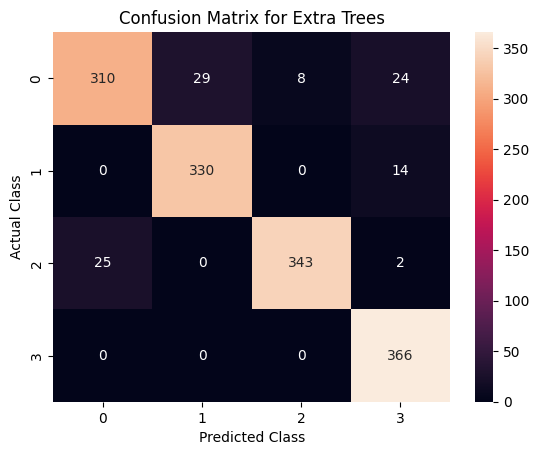

In [ ]:
cm = confusion_matrix(y_test, y_ET_pred_test)
sns.heatmap(cm, annot=True, fmt='g')
xmpltlb.xlabel('Predicted Class')
xmpltlb.ylabel('Actual Class')
xmpltlb.title('Confusion Matrix for Extra Trees')
xmpltlb.show()


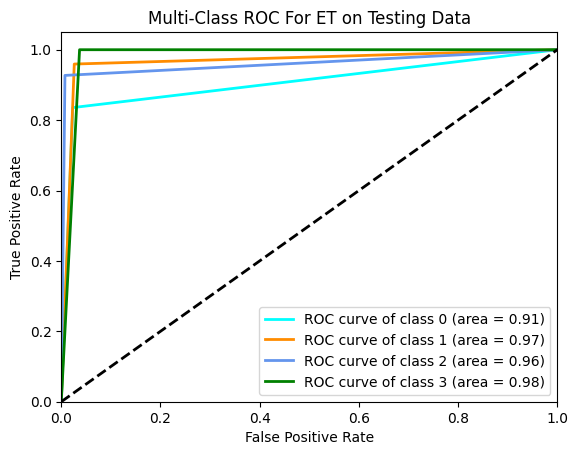

In [ ]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_ET_pred_test_bin = label_binarize(y_ET_pred_test, classes=[0, 1, 2, 3])

n_classes = y_train_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_ET_pred_test_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
xmpltlb.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(n_classes), colors):
    xmpltlb.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

xmpltlb.plot([0, 1], [0, 1], 'k--', lw=2)
xmpltlb.xlim([0.0, 1.0])
xmpltlb.ylim([0.0, 1.05])
xmpltlb.xlabel('False Positive Rate')
xmpltlb.ylabel('True Positive Rate')
xmpltlb.title('Multi-Class ROC For ET on Testing Data')
xmpltlb.legend(loc="lower right")
xmpltlb.show()


## AdaBoost With Random Forest as Base Estimator

In [ ]:
# Create a RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=2, min_samples_split=20, min_samples_leaf=15)

# Create AdaBoost classifier object
ada_clf = AdaBoostClassifier(base_estimator=rf_clf)

# Train Adaboost Classifier
ada_clf.fit(X_train, y_train)

# Predict the response for train dataset
y_ada_pred_train = ada_clf.predict(X_train)

# Predict the response for test dataset
y_ada_pred_test = ada_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# Model Accuracy, Precision, Recall and F1 Score for train data
acc_ada_train = accuracy_score(y_train, y_ada_pred_train)
precision_ada_train = precision_score(y_train, y_ada_pred_train, average='macro')
recall_ada_train = recall_score(y_train, y_ada_pred_train, average='macro')
f1_ada_train = f1_score(y_train, y_ada_pred_train, average='macro')

print(f"Training Accuracy of AdaBoost : {acc_ada_train}")
print(f"Training Precision of AdaBoost : {precision_ada_train}")
print(f"Training Recall of AdaBoost : {recall_ada_train}")
print(f"Training F1 Score of AdaBoost : {f1_ada_train}")

Training Accuracy of AdaBoost : 0.9370753323485967
Training Precision of AdaBoost : 0.939386565547317
Training Recall of AdaBoost : 0.936608127242511
Training F1 Score of AdaBoost : 0.936486901644857


In [ ]:
print(classification_report(y_train, y_ada_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       838
           1       0.93      0.99      0.96       865
           2       1.00      0.86      0.93       839
           3       0.96      1.00      0.98       843

    accuracy                           0.94      3385
   macro avg       0.94      0.94      0.94      3385
weighted avg       0.94      0.94      0.94      3385



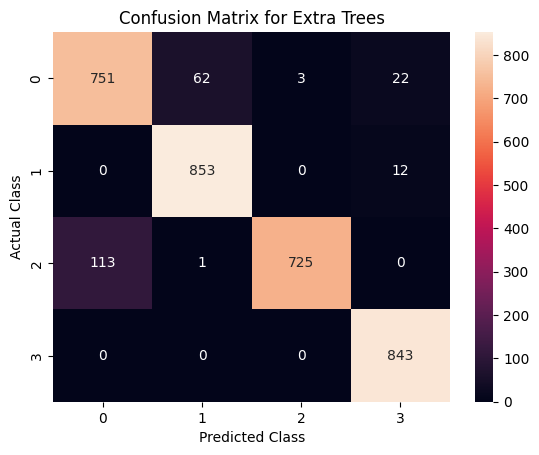

In [ ]:
cm = confusion_matrix(y_train, y_ada_pred_train)
sns.heatmap(cm, annot=True, fmt='g')
xmpltlb.xlabel('Predicted Class')
xmpltlb.ylabel('Actual Class')
xmpltlb.title('Confusion Matrix for Extra Trees')
xmpltlb.show()


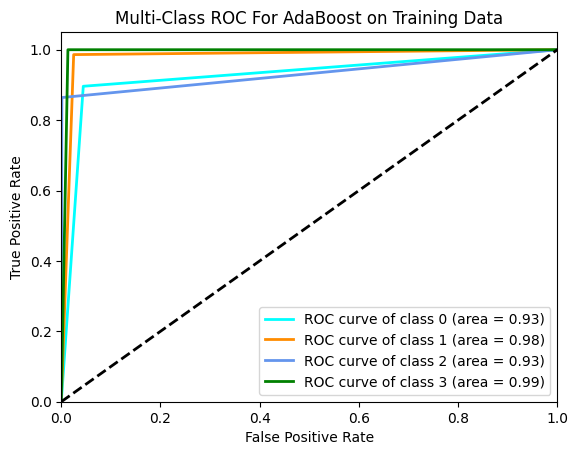

In [ ]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])
y_ada_pred_train_bin = label_binarize(y_ada_pred_train, classes=[0, 1, 2, 3])

n_classes = y_train_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_ada_pred_train_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
xmpltlb.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(n_classes), colors):
    xmpltlb.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

xmpltlb.plot([0, 1], [0, 1], 'k--', lw=2)
xmpltlb.xlim([0.0, 1.0])
xmpltlb.ylim([0.0, 1.05])
xmpltlb.xlabel('False Positive Rate')
xmpltlb.ylabel('True Positive Rate')
xmpltlb.title('Multi-Class ROC For AdaBoost on Training Data')
xmpltlb.legend(loc="lower right")
xmpltlb.show()


In [ ]:
acc_ada_test = accuracy_score(y_test, y_ada_pred_test)
precision_ada_test = precision_score(y_test, y_ada_pred_test, average='macro')
recall_ada_test = recall_score(y_test, y_ada_pred_test, average='macro')
f1_ada_test = f1_score(y_test, y_ada_pred_test, average='macro')

print(f"Testing Accuracy of AdaBoost : {acc_ada_test}")
print(f"Testing Precision of AdaBoost : {precision_ada_test}")
print(f"Testing Recall of AdaBoost : {recall_ada_test}")
print(f"Testing F1 Score of AdaBoost : {f1_ada_test}")

Testing Accuracy of AdaBoost : 0.9255685733976567
Testing Precision of AdaBoost : 0.9273703099801822
Testing Recall of AdaBoost : 0.9268116773766182
Testing F1 Score of AdaBoost : 0.9255753108631917


In [ ]:
print(classification_report(y_test, y_ada_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       371
           1       0.92      0.98      0.95       344
           2       0.98      0.86      0.92       370
           3       0.94      1.00      0.97       366

    accuracy                           0.93      1451
   macro avg       0.93      0.93      0.93      1451
weighted avg       0.93      0.93      0.92      1451



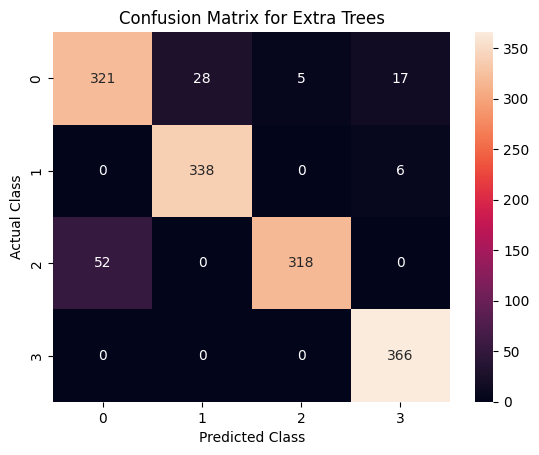

In [ ]:
cm = confusion_matrix(y_test, y_ada_pred_test)
sns.heatmap(cm, annot=True, fmt='g')
xmpltlb.xlabel('Predicted Class')
xmpltlb.ylabel('Actual Class')
xmpltlb.title('Confusion Matrix for Extra Trees')
xmpltlb.show()


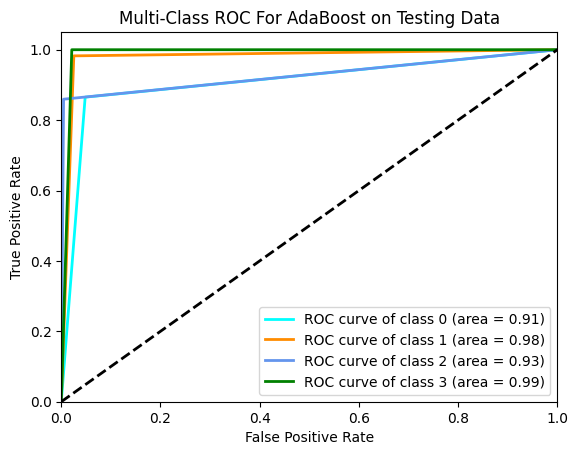

In [ ]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_ada_pred_test_bin = label_binarize(y_ada_pred_test, classes=[0, 1, 2, 3])

n_classes = y_train_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_ada_pred_test_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
xmpltlb.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(n_classes), colors):
    xmpltlb.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

xmpltlb.plot([0, 1], [0, 1], 'k--', lw=2)
xmpltlb.xlim([0.0, 1.0])
xmpltlb.ylim([0.0, 1.05])
xmpltlb.xlabel('False Positive Rate')
xmpltlb.ylabel('True Positive Rate')
xmpltlb.title('Multi-Class ROC For AdaBoost on Testing Data')
xmpltlb.legend(loc="lower right")
xmpltlb.show()


## Comparison Graphs

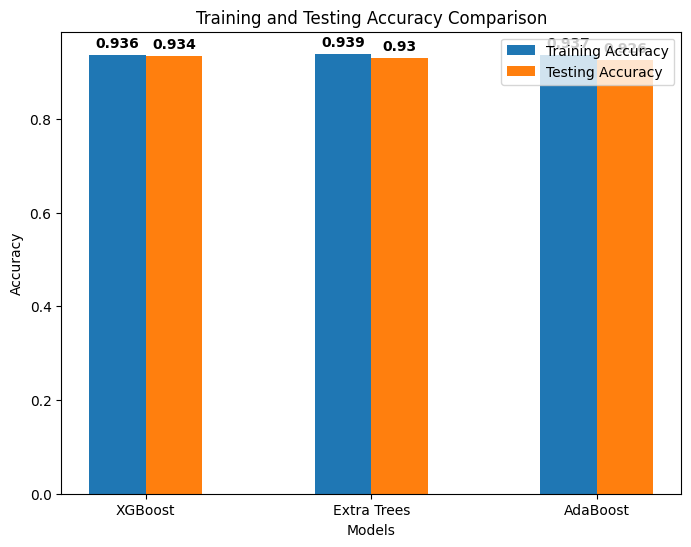

In [ ]:
# Define model names for the plot
model_names = ['XGBoost', 'Extra Trees', 'AdaBoost']

# Define training and testing accuracies
train_accuracies = [acc_xgb_train, acc_ET_train, acc_ada_train]
test_accuracies = [acc_xgb_test, acc_ET_test, acc_ada_test]

# Create a bar plot
fig, ax = xmpltlb.subplots(figsize=(8,6))
bar_width = 0.25  # Decreased bar_width to 0.25
index = np.arange(len(model_names))

bar1 = ax.bar(index, train_accuracies, bar_width, label='Training Accuracy')
bar2 = ax.bar(index + bar_width, test_accuracies, bar_width, label='Testing Accuracy')

# Add accuracy values on top of the bars
for i, v in enumerate(train_accuracies):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', color='black', fontweight='bold')
for i, v in enumerate(test_accuracies):
    ax.text(i + bar_width, v + 0.01, str(round(v, 3)), ha='center', va='bottom', color='black', fontweight='bold')

# Customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing Accuracy Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

# Show the plot
xmpltlb.show()
